In [1]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
pwd

'/home/dgxadmin/gcubme4/Workspace/JW_Seo/DBT/code/1_segmentation'

In [4]:
aimages= np.load('./result/npy/exp1/test1_all_result_512.npy')
origin_img= np.load('../../data/2020_12/1_npy/GEall_img_4.npy')
origin_Bmask=np.load('../../data/2020_12/1_npy/GEmor_Bmask_5.npy')
origin_Pmask=np.load('../../data/2020_12/1_npy/GEall_Pmask_4.npy')

In [6]:
label = np.load('../../data/2020_12/1_npy/GElabel_5.npy')

In [26]:
print(origin_Bmask.shape)
print(origin_Pmask.shape)

(201, 512, 512)
(201, 512, 512)


In [46]:
bmask = np.zeros((201,512,512,3), dtype=np.uint8)
pmask = np.zeros((201,512,512,3), dtype=np.uint8)
ori_img = np.ndarray((201,512,512,3), dtype=np.uint8)

In [47]:
for i in range(3):
    ori_img[:,:,:,i] = origin_img[1002:,:,:,0]
bmask[:,:,:,0] = origin_Bmask
pmask[:,:,:,1] = origin_Pmask

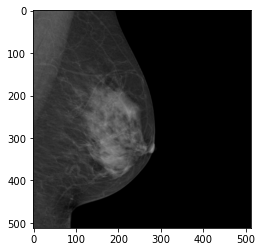

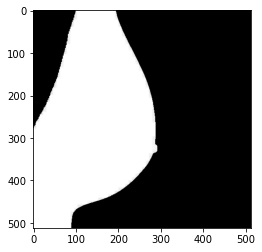

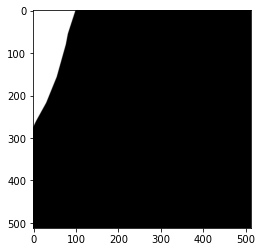

In [39]:
plt.figure()
plt.imshow(ori_img[0])
plt.figure()
plt.imshow(bmask[0])
plt.figure()
plt.imshow(pmask[0])

(-0.5, 511.5, 511.5, -0.5)

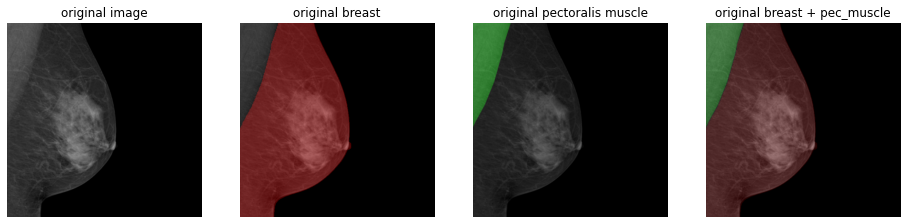

In [49]:
"""
alpha blanding for making figure
"""
ll=0
alpha = 0.7

# addWeighted() 함수로 알파 블렌딩 적용
bland_p = cv2.addWeighted(ori_img, alpha, pmask, (1-alpha),0)
# bland_p_p= bland_p.copy()
bland_b = cv2.addWeighted(ori_img, alpha, bmask, (1-alpha),0)
# bland_b_p= bland_b.copy()
bland_a = cv2.addWeighted(bland_p, alpha, bland_b, 0.5,0)

plt.figure(figsize=(16, 4))
plt.subplot(1,4,1)
plt.title('original image')
plt.imshow(ori_img[ll],cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.title('original breast')
plt.imshow(bland_b[ll],cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.title('original pectoralis muscle')
plt.imshow(bland_p[ll],cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.title('original breast + pec_muscle')
plt.imshow(bland_a[ll],cmap='gray')
plt.axis('off')

